# Course: Matplotlib for Python Developers (Benjamin Keller)

https://www.packtpub.com/product/matplotlib-for-python-developers-video/9781787281998


Useful docs: 

https://matplotlib.org/stable/api/artist_api.html#matplotlib.artist.Artist

https://matplotlib.org/stable/api/patches_api.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy 
from IPython.display import Image

# Figure And Axes


Each figure can contain one or more axes.

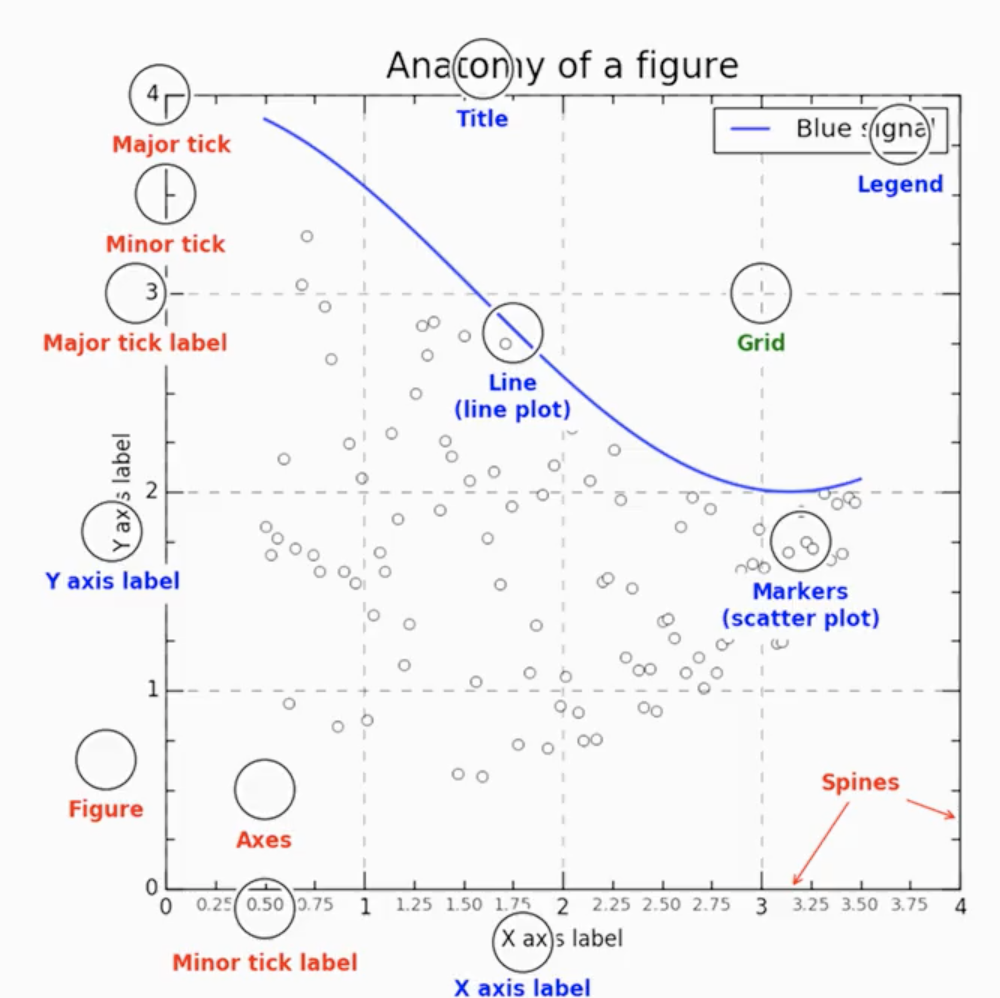

In [ ]:
# the anatomy of a matplot lib figure

Image("anatomy.png", width=400, height=400)

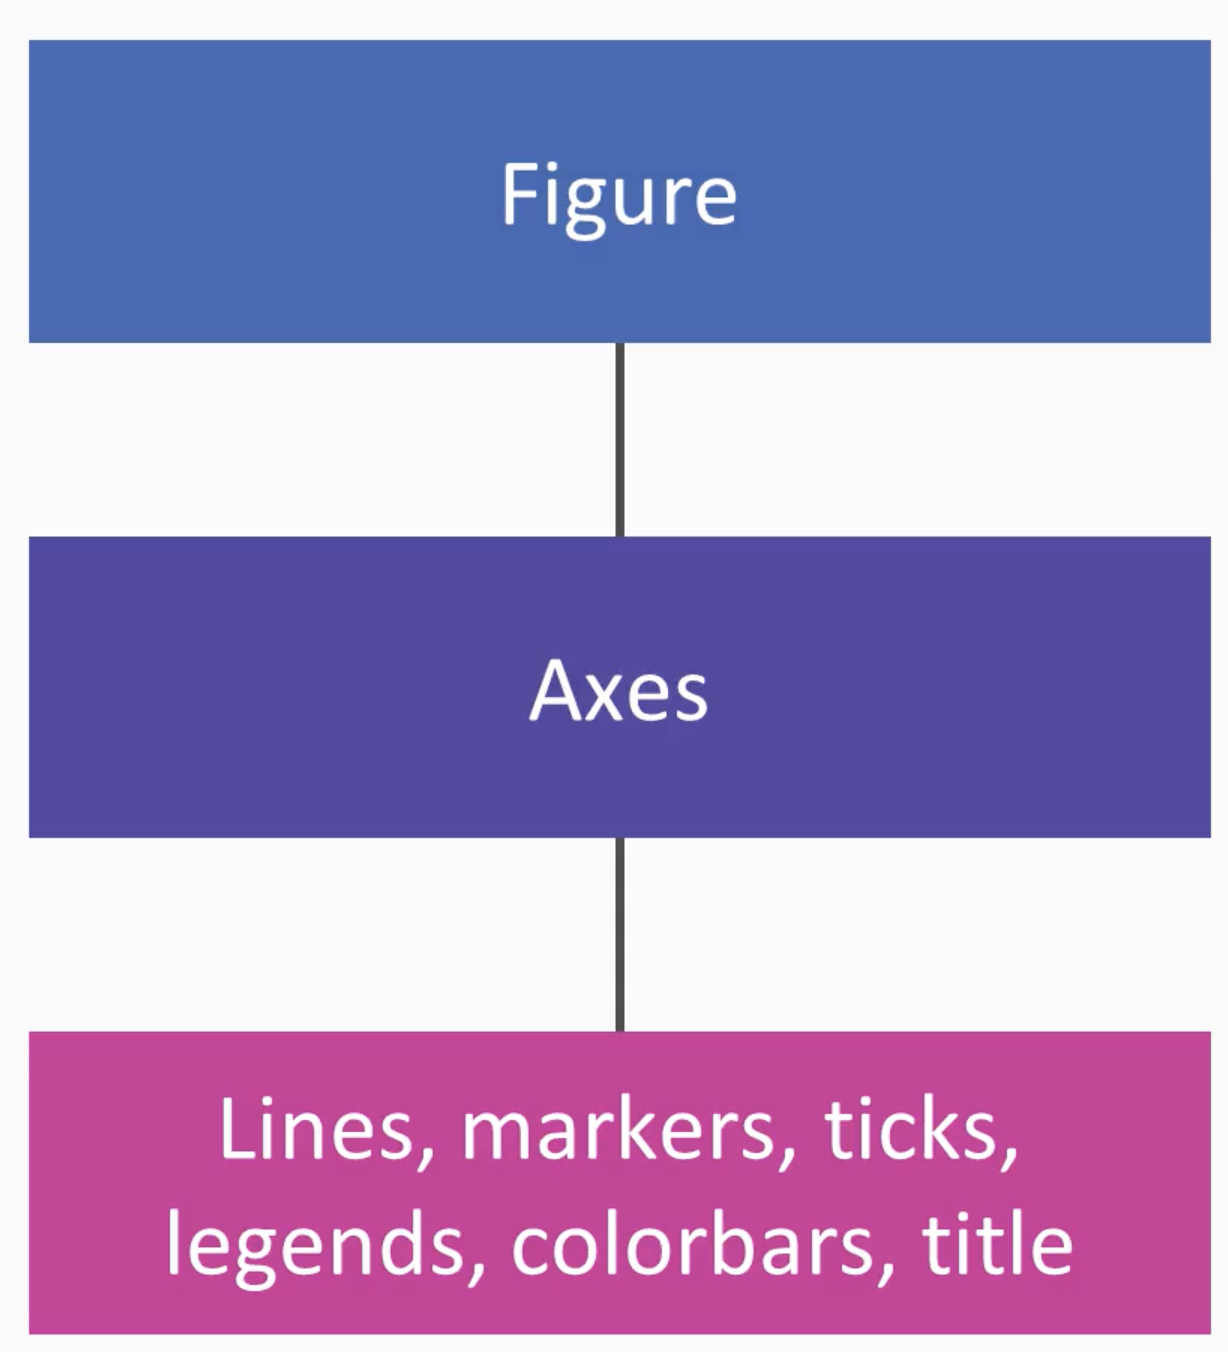

In [ ]:
Image("hierarquia.png", width=200, height=200)

Figure(500x400)
Axes(0.5,0.65;0.3x0.3)
XAxis(0.0,0.0)
YAxis(0.0,0.0)


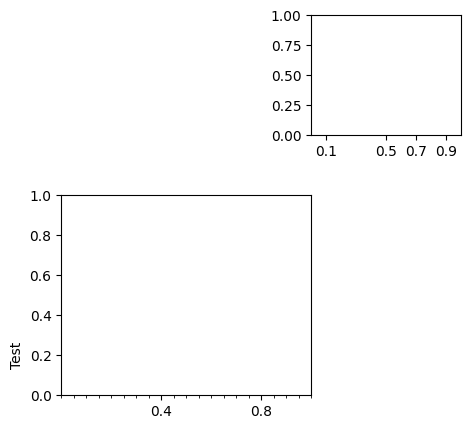

In [ ]:
fig = plt.figure(figsize = (5,4), dpi=100)

print(plt.gcf()) # get current figure 

#fig.set_size_inches((5,4)) # another option to set/change the size
#fig.set_dpi(100) # another option to set/change the dpi
ax = fig.add_axes([0, 0, 0.5, 0.5]) # position in the figure[left, bottom, width, height] that are proportions of the figzsize
ax2 = fig.add_axes([0.5, 0.65, 0.3, 0.3])

print(plt.gca()) # get current ax

#The axes has an x axis and a y axis:
print(ax.xaxis)
print(ax.yaxis)

# customizing the x axis ticks
from matplotlib import ticker

## axis major tickers
ax.xaxis.set_major_locator(ticker.MaxNLocator(3, # number of tickes
                                              #integer=True, # only integers
                                              prune='lower')) # prune 'lower' removes the leftmost ticker (0 in this example)

ax2.xaxis.set_major_locator(ticker.FixedLocator([0.1,0.5,0.7,0.9])) # specify the positions       

## axis minor tickers
ax.xaxis.set_minor_locator(ticker.MaxNLocator(20))

# axis labels and label positioning functions
ax.set_ylabel('Test')
#ax.yaxis.set_label_position('left')
#ax.yaxis.set_label_coords(x=0, y=0.5)
ax.yaxis.label.set_y(y=0.2)

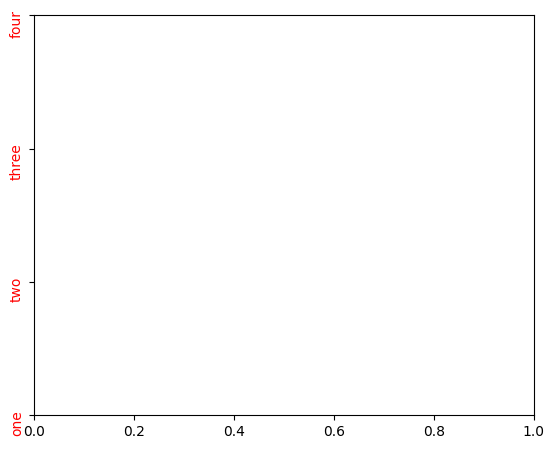

In [18]:
fig = plt.figure(figsize = (5,4), dpi=100)
ax3 = fig.add_axes([0,0,1,1])

ax3.set_ylim(1, 4) # set axis y limits
ax3.set_yticks([1, 2, 3, 4], 
               ['one', 'two', 'three', 'four'],
               rotation='vertical',
               color='r') # set y tickers, labels, orientation (vertical/horizontal/degrees and color)

## Formatters

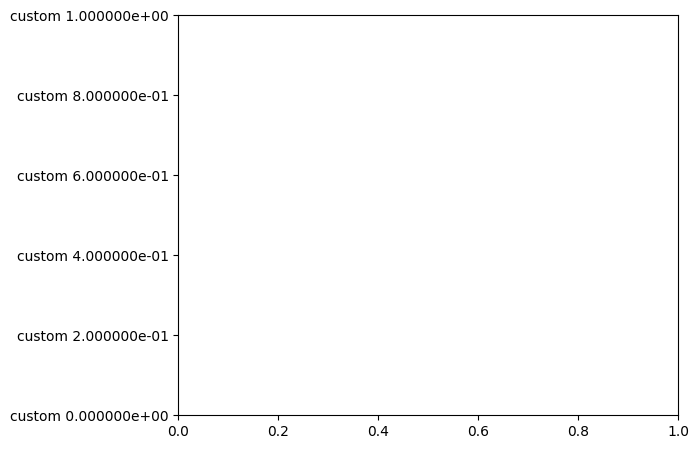

In [28]:
# You can also use a ticker formatter. There are lot of them ready for use.Some examples:
# - ticker.NullFormatter(): no labels
# - ticker.ScalarFormatter(): useful to convert log and scientific notation to scalar numbers (common)
# - ticker.LogFormatter(): useful to convert to log notation
# - ticker.EngFormatter(unit='Hz'): useful to format to a unit notation. The label will have the unit set.
# - ticker.FormatStrFormatter('my string %e'): let you customize. In this example, show exponential (%e) with a prefix
# - ticker.FuncFormatter(my_function): let you use a formatter function. For instance, the function could be: my_function = lambda x, pos: np.sqrt(x)

from matplotlib import ticker

fig = plt.figure(figsize = (5,4), dpi=100)
ax4 = fig.add_axes([0,0,1,1])

plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('custom %e')) 

## Transformations

https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html

Matplot lib uses 4 coordinate systems: 
- Data: The coordinate system of the data in the Axes.
- Axes: The coordinate system of the Axes; (0, 0) is bottom left of the axes, and (1, 1) is top right of the axes.
- Figure: The coordinate system of the Figure; (0, 0) is bottom left of the figure, and (1, 1) is top right of the figure.
- Display: The native coordinate system of the output ; (0, 0) is the bottom left of the window, and (width, height) is top right of the output in "display units".The exact interpretation of the units depends on the back end. For example it is pixels for Agg and points for svg/pdf.

Transformations allows to get coordinates related to these different coordinate systems.

- ax.transData.transform():  converts values in data coordinates to display coordinates
- ax.transData.inversed(): converts from display coordinates to data coordinates.
- ax.transAxes.transform()
- ax.transFigure.transform((
- ax.transScale.transform()

[2560.    52.8]
[5. 0.]


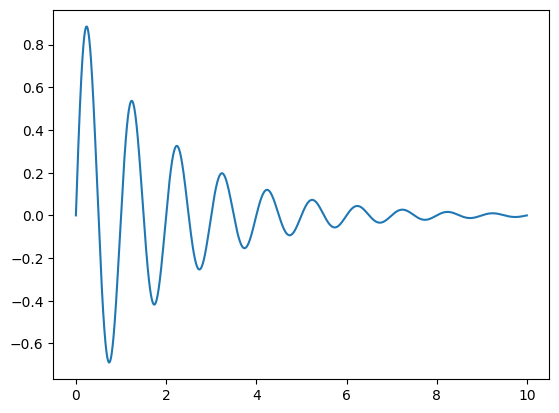

In [ ]:
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)

print(ax.transData.transform((5, 0)))
print(ax.transData.inverted().transform((2560., 52.8)))

## Backends

Matplotlib is a plotting library. It relies on some backend to actually render the plots. The default backend is the agg backend.  This backend only renders PNGs. On Jupyter notebooks the matplotlib backends are special as they are rendered to the browser. 

https://gist.github.com/CMCDragonkai/4e9464d9f32f5893d837f3de2c43daa4

In [29]:
import matplotlib

# show all backends available
matplotlib.rcsetup.all_backends

['GTK3Agg',
 'GTK3Cairo',
 'GTK4Agg',
 'GTK4Cairo',
 'MacOSX',
 'nbAgg',
 'QtAgg',
 'QtCairo',
 'Qt5Agg',
 'Qt5Cairo',
 'TkAgg',
 'TkCairo',
 'WebAgg',
 'WX',
 'WXAgg',
 'WXCairo',
 'agg',
 'cairo',
 'pdf',
 'pgf',
 'ps',
 'svg',
 'template']

In [30]:
# current backend
print(plt.get_backend())

module://matplotlib_inline.backend_inline


In [1]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [1]:
%matplotlib notebook # to enable interactive plots in Jupiter. Colab does not support it

In [2]:
# to change the backend (need to be set before import pyplot)

import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt_tkagg
import numpy as np

xvals = np.arange(0, 10, 0.1)
plt_tkagg.plot(xvals, np.sin(xvals))
plt_tkagg.show()

<IPython.core.display.Javascript object>

# Matplotlib Global Params

In [ ]:
%matplotlib inline

# to set the global matplotlib params use the rcParams (runtime configurations
plt.rcParams['figure.figsize'] = (2,1)
plt.rcParams['figure.dpi'] = 150

# Plots

There are two functions for plot: plot() and scatter().

When using **plot()** the order in the array matters because it connects points in the order in which they appear in the input sequence;
**scatter()** does not connect, and has additional capabilities for varying the symbol, size, and color.

### Line Plot 

#### plot()

In [ ]:
xvals = np.arange(0,10,0.1) # start, end, stop

Text(0, 0.5, '$y$')

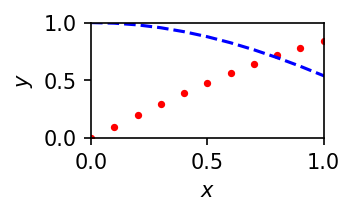

In [ ]:
# axes ranges
plt.ylim(0,1)
plt.xlim(0,1)

# labels and legends
plt.plot(xvals, np.sin(xvals), label=r"$y = \sin(x)$", 
         color="red", linestyle="none", marker=".", markevery=1, markersize=5)
plt.plot(xvals, np.cos(xvals), 
         label=r"$y = \cos(x)$", color="blue", linestyle="--", )

#plt.legend() # show the labels in a legend
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

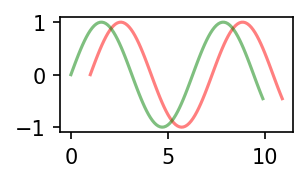

In [ ]:
# Use the zorder to specify which plot go over the other
# Set transparency with alpha
plt.plot(xvals, np.sin(xvals), zorder=1, color="green", alpha=0.5)
plt.plot(xvals+1, np.sin(xvals), zorder=0, color="red", alpha=0.5)

#### scatter()

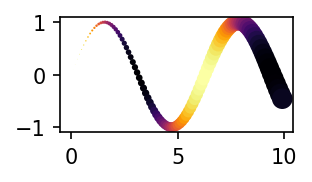

In [ ]:
plt.scatter(xvals, np.sin(xvals), 
            c=np.cos(xvals), edgecolor="none", cmap="inferno", #colors
            s=np.power(xvals, 2) # size
            )

#### With Confidence Interval (C.I.)

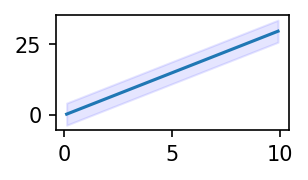

In [ ]:
#example data
x = np.linspace(0.1, 9.9, 20) # evenly spaced numbers over a specified interval (start, stop, num)
y = 3.0 * x

#confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

### Bar plot

In [ ]:
nums = np.random.uniform(size=10) # bar sizes

<BarContainer object of 10 artists>

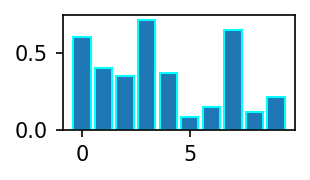

In [ ]:
# vertical bars with labels aligned to the center
plt.bar(np.arange(10), height=nums, edgecolor='cyan', align='center')

<BarContainer object of 10 artists>

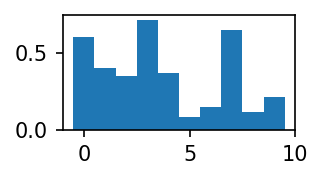

In [ ]:
# vertical bars with labels aligned to the center
# use the width to control the spacing between bars (1 is no space)
plt.bar(np.arange(10), height=nums, align='center', width=1)

<BarContainer object of 10 artists>

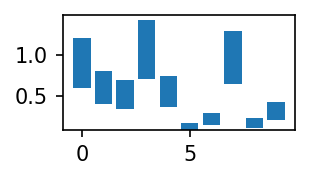

In [ ]:
# vertical bars with labels aligned to the center
# use the bottom to control the position the bar in relation to y axis
# it can a be a fixed y value or an array
plt.bar(np.arange(10), height=nums, align='center', bottom=nums)

<BarContainer object of 10 artists>

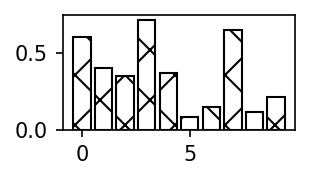

In [ ]:
# vertical bars with labels aligned to the center
# use hatch to change the bar background style
plt.bar(np.arange(10), height=nums, color='none', edgecolor='black', align='center', hatch='x')

<BarContainer object of 10 artists>

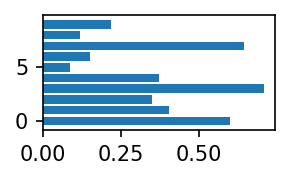

In [ ]:
# horizontal
plt.barh(np.arange(10), width=nums, align='center')

#### With Errors

Text(0, 0.5, 'Mean')

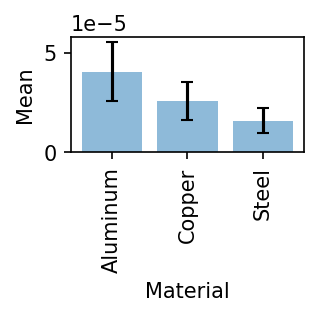

In [ ]:
# Show errors

# Enter raw data
aluminum = np.array([6.4e-5 , 3.01e-5 , 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5, 4.2e-5, 2.62e-5, 3.6e-5])
copper = np.array([4.5e-5 , 1.97e-5 , 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 2.41e-5 , 1.85e-5, 3.3e-5 ])
steel = np.array([3.3e-5 , 1.2e-5 , 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 1.58e-5, 1.32e-5 , 2.1e-5])

# Calculate the average
aluminum_mean = np.mean(aluminum)
copper_mean = np.mean(copper)
steel_mean = np.mean(steel)

# Calculate the standard deviation
aluminum_std = np.std(aluminum)
copper_std = np.std(copper)
steel_std = np.std(steel)

# Create lists for the plot
materials = ['Aluminum', 'Copper', 'Steel']
x_pos = np.arange(len(materials))
means = [aluminum_mean, copper_mean, steel_mean]
error = [aluminum_std, copper_std, steel_std]

plt.bar(x_pos, means, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=3)
plt.xticks(x_pos, labels=materials, rotation='vertical')
plt.xlabel("Material")
plt.ylabel("Mean")

### Histogram

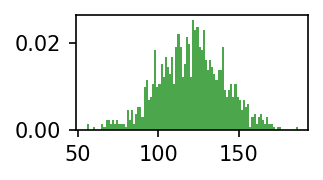

In [ ]:
np.random.seed(10**7)
mu = 121 # mean
sigma = 21 # standard deviation
x = mu + sigma * np.random.randn(1000)
num_bins = 100

# it returns n, bins and patches in matplotlib. 
# Patches are the containers of individual artists used to create the histogram or list of such containers if there are multiple input datasets.
# (https://matplotlib.org/stable/api/patches_api.html)
n, bins, patches = plt.hist(x, 
                            num_bins, # could be bins='auto'
                            density = 1,
                            color ='green',
                            alpha = 0.7)

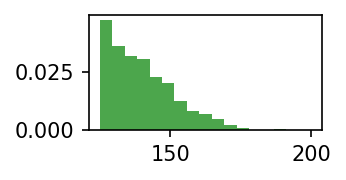

In [ ]:
# too zoom in a specific range of the histogram use range=(min, max)
n, bins, patches = plt.hist(x, 
                            bins='auto',
                            density = 1,
                            histtype='stepfilled',
                            color ='green',
                            alpha = 0.7,
                            range=(125, 200))

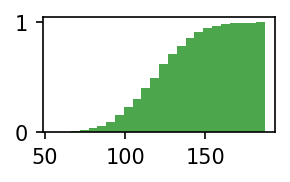

In [ ]:
# cumulative 
n, bins, patches = plt.hist(x, 
                            bins='auto',
                            density = 1,
                            histtype='stepfilled',
                            color ='green',
                            alpha = 0.7,
                            cumulative=True # could be comulative=-1 to invert 
                            )

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00878787, 0.03954541, 0.05712115, 0.20212099, 0.43060558,
         0.49871157, 0.48552976, 0.27681787, 0.15378771, 0.03075754,
         0.00878787, 0.00219697, 0.00219697, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.0131818 , 0.05712115, 0.09227262, 0.16257558, 0.25045427,
         0.41962075, 0.36030263, 0.36030263, 0.22628763, 0.16257558,
         0.05272721, 0.02636361, 0.0065909 , 0.00439393, 0.        ,
         0.00219697, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        ,

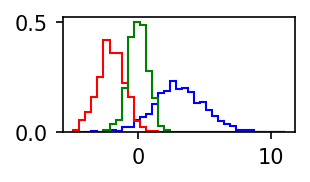

In [ ]:
# multiples not stacked histograms 
mu, sigma = 200, 25
np.random.seed(365)
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist([x1, x2, x3], bins='auto', histtype='step', color=['green', 'red', 'blue'], density=True, stacked=False)


(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00292929, 0.0131818 , 0.01904038, 0.06737366, 0.14353519,
         0.16623719, 0.16184325, 0.09227262, 0.05126257, 0.01025251,
         0.00292929, 0.00073232, 0.00073232, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.00439393, 0.01904038, 0.03075754, 0.05419186, 0.08348476,
         0.14280287, 0.13328268, 0.13914126, 0.14280287, 0.19772705,
         0.18381293, 0.17063112, 0.09446959, 0.05272721, 0.01025251,
         0.00366161, 0.00073232, 0.00073232, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.00439393, 0.01904038,

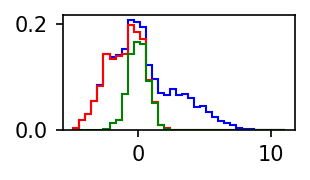

In [ ]:
# multiples stacked histograms 

mu, sigma = 200, 25
np.random.seed(365)
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist([x1, x2, x3], bins='auto', histtype='step', color=['green', 'red', 'blue'], density=True, stacked=True)


<Axes: ylabel='Frequency'>

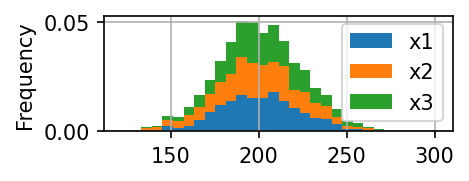

In [ ]:
# Overlapping histograms

mu, sigma = 200, 25
np.random.seed(365)
x1 = mu + sigma*np.random.randn(990, 1)
x2 = mu + sigma*np.random.randn(980, 1)
x3 = mu + sigma*np.random.randn(1000, 1)

# create the dataframe; enumerate is used to make column names
df = pd.concat([pd.DataFrame(a, columns=[f'x{i}']) for i, a in enumerate([x1, x2, x3], 1)], axis=1)

# plot the data
df.plot.hist(stacked=True, bins=30, density=True, figsize=(3, 1), grid=True)

[[-1.10573193 -0.71976392 -1.19156315]
 [-0.71626647  1.05704474 -1.06779116]
 [ 0.08811934  0.05203229 -0.63688214]
 [-0.46176249 -1.7362652  -0.80544243]]


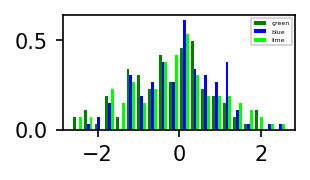

In [ ]:
np.random.seed(10**7)
n_bins = 20
x = np.random.randn(100, 3)
print(x[1:5])

colors = ['green', 'blue', 'lime']
 
plt.hist(x, n_bins, 
         density = True,
         color = colors,
         label = colors)
 
plt.legend(prop ={'size': 3})

### imshow

The imshow() is used to display data as an image; i.e. on a 2D regular raster.

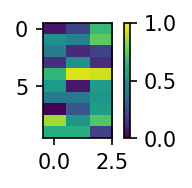

In [ ]:
plt.imshow(np.random.random((10, 3)), vmin=0, vmax=1, aspect=0.5)
plt.colorbar() 

### Scatter plot

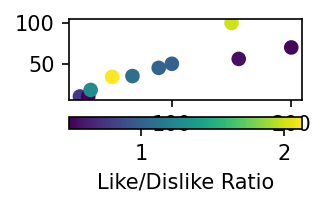

In [ ]:
# List of total number of items purchased 
purchaseCount = [100, 200, 150, 23, 30, 50,
                 156, 32, 67, 89]
  
# List of total likes of 10 products
likes = [50, 70, 100, 10, 10, 34, 56, 18, 35, 45]
  
# List of Like/Dislike ratio of 10 products
ratio = [1, 0.53, 2, 0.76, 0.5, 2.125, 0.56, 
         1.28, 1.09, 1.02]
plt.scatter(x=purchaseCount,
            y=likes, 
            c=ratio # array-like or list of colors or color
            ) 
  
plt.colorbar(label="Like/Dislike Ratio", orientation="horizontal") 

### Errobar

<ErrorbarContainer object of 3 artists>

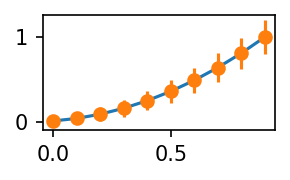

In [ ]:
# defining our function
x = np.arange(10)/10
y = (x + 0.1)**2
 
# defining our error
y_error = np.linspace(0.05, 0.2, 10)
 
# plotting our function and
# error bar
plt.plot(x, y)
 
plt.errorbar(x, y, yerr = y_error, fmt ='o')

# Subplot and Subplots

subplot(): creates only a single subplot axes at a specified grid position.
For instance:

```
# first you have to make the figure
fig = plt.figure(1)

# now you have to create each subplot individually
ax1 = plt.subplot(2,3,1) # or ax1 = fig.add_subplot(2,3,1)

ax2 = plt.subplot(2,3,2) # or ax2 = fig.add_subplot(2,3,2)
```



subplots() is used to create a figure with several subplots with only one line of code. For instance:

```
fig, axes = plt.subplots(nrows=2, ncols=3)  # a 2x3 array of axes objects

for ax in axes:
  pass
```



## Subplot

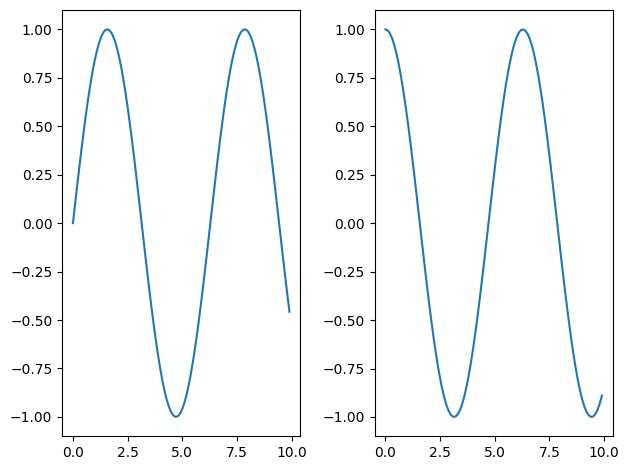

In [ ]:
# VERTICAL

nums = np.arange(0, 10, 0.1)

# chart 1
plt.subplot(1, 2, 1) # rows number (1), columns number (2), current plot number (1)
plt.plot(nums, np.sin(nums)) 

# chart 2
plt.subplot(1, 2, 2) # rows number (1), columns number (2), current plot number (2)
plt.plot(nums, np.cos(nums)) 
plt.tight_layout() # adjust spacing between charts to avoid overlaps

Text(0, 0.5, 'cos')

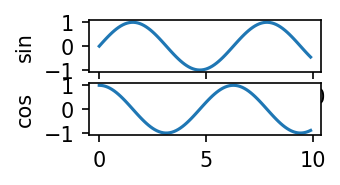

In [ ]:
# HORIZONTAL

nums = np.arange(0, 10, 0.1)

# chart 1
plt.subplot(2, 1, 1) # rows number (2), columns number (1), current plot number (1)
plt.plot(nums, np.sin(nums)) 
plt.ylabel('sin')

# chart 2
plt.subplot(2, 1, 2) # rows number (2), columns number (1), current plot number (2)
plt.plot(nums, np.cos(nums)) 
plt.ylabel('cos')

## Subplots

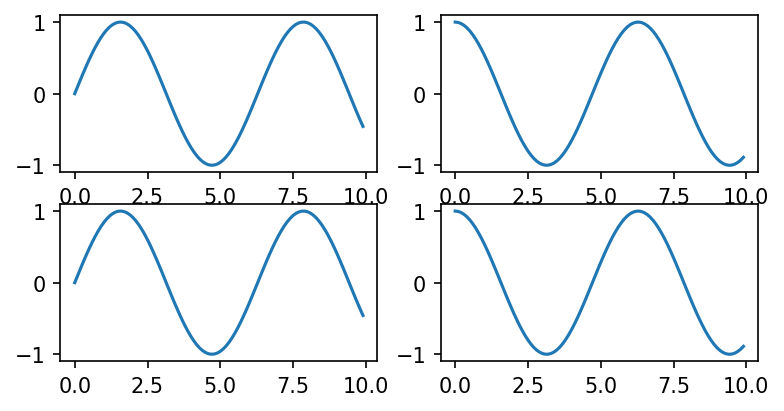

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0, 0].plot(nums, np.sin(nums))
axes[0, 1].plot(nums, np.cos(nums))
axes[1, 0].plot(nums, np.sin(nums))
axes[1, 1].plot(nums, np.cos(nums))

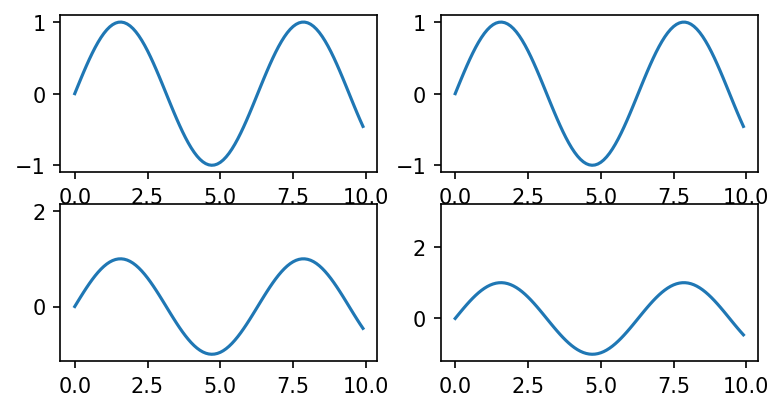

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2)

for i, ax in enumerate(axes.flatten()):
  ax.plot(nums, np.sin(nums), i)

## GridSpec

Use it to go beyond a regular grid to subplots that span multiple rows and columns

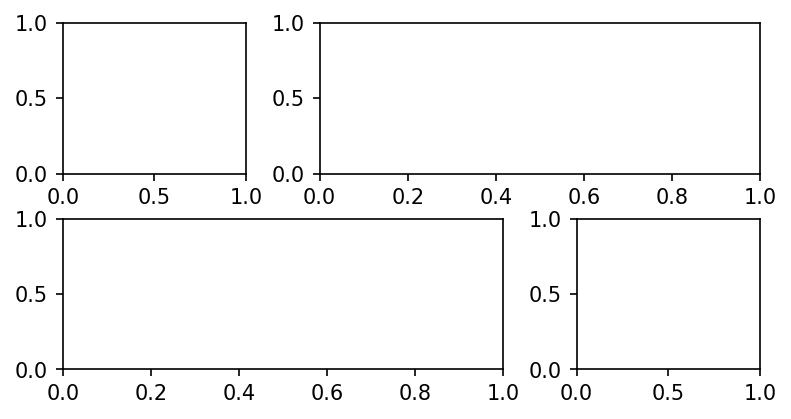

In [ ]:
plt.rcParams['figure.figsize'] = (6,3)
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

# Legend

- use loc argument to specify the label position (best, upper left, upper center, etc). Also can be a coordinate

- use the ncol to distribute the labels in more than one column

- frameon show the legend in a box. To hide the box set it to False

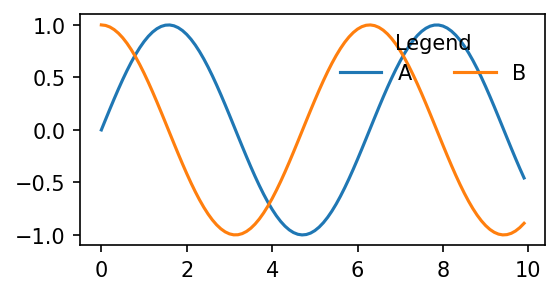

In [ ]:
plt.figure(figsize=(4,2))
plt.plot(nums, np.sin(nums), label='A')
plt.plot(nums, np.cos(nums), label='B')
plt.legend(loc='upper right', ncol=2, title='Legend', frameon=False, fontsize=10) 